In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/data.csv')

In [ ]:
df.shape

(200, 4)

In [ ]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
Target_col = 'Target'
x= df.loc[:,df.columns!=Target_col]
y= df.loc[:,Target_col]

In [ ]:
 # split the data into train and test with 70% data being used for training
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#Linear Regresion using stats model

In [ ]:
x_with_constant = sm.add_constant(x_train)
model = sm.OLS(y_train,x_with_constant)

In [ ]:
results = model.fit()
results.params

,0
const,2.708949
Feature 1,0.044059
Feature 2,0.199287
Feature 3,0.006882


In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Thu, 07 Aug 2025   Prob (F-statistic):           1.88e-69
Time:                        14:26:45   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7089      0.374      7.250      0.0

# Linear regression problem of simple liner regression


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# 2. Create simple dataset
data = {
    'Size (sqft)': [500, 1000, 1500, 2000, 2500],
    'Price (in lakhs)': [30, 50, 70, 90, 110]
}
df = pd.DataFrame(data)

In [ ]:
# 3. Define features (X) and target (y)
X = df[['Size (sqft)']]
y = df['Price (in lakhs)']

In [ ]:
# 4. Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)



LinearRegression()

In [ ]:
# 5. Predict price for a new house
predicted_price = model.predict([[1800]])
print(f"Predicted price for 1800 sqft house: ₹{predicted_price[0]:.2f} lakhs")

Predicted price for 1800 sqft house: ₹82.00 lakhs


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


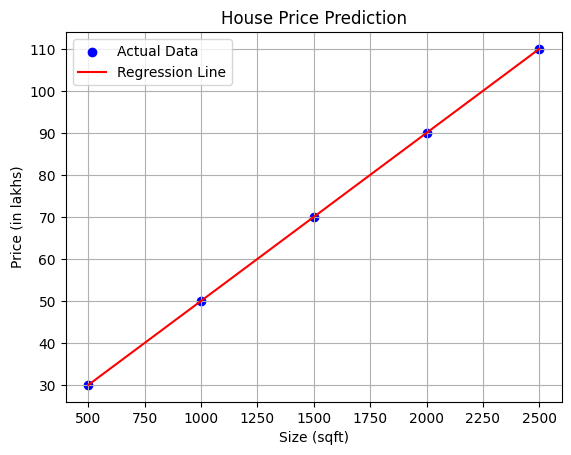

In [ ]:
# 6. Plot the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Size (sqft)')
plt.ylabel('Price (in lakhs)')
plt.title('House Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Multiple linear regression


In [ ]:
# 2. Create dataset
data = {
    'Size_sqft': [1500, 1800, 2400, 3000, 3500],
    'Bedrooms': [3, 4, 3, 5, 4],
    'Age_years': [10, 5, 8, 2, 4],
    'Price_lakhs': [65, 80, 95, 130, 150]
}


In [ ]:
df = pd.DataFrame(data)


In [ ]:
df

,Size_sqft,Bedrooms,Age_years,Price_lakhs
0,1500,3,10,65
1,1800,4,5,80
2,2400,3,8,95
3,3000,5,2,130
4,3500,4,4,150


In [ ]:
df.shape

(5, 4)

In [ ]:
X=df[['Size_sqft','Bedrooms','Age_years']]
y=df['Price_lakhs']

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
# 5. Coefficients and intercept
print("Coefficients:(b1,b2,b3)", model.coef_)
print("Intercept:(b0)", model.intercept_)

Coefficients:(b1,b2,b3) [0.04052448 6.73426573 0.71212121]
Intercept:(b0) -24.600233100233112


In [ ]:
# 6. Predict the price for a new house
new_house = [[2000, 4, 3]]  # 2000 sqft, 4 bedrooms, 3 years old
predicted_price = model.predict(new_house)
print(f"Predicted Price: ₹{predicted_price[0]:.2f} lakhs")

Predicted Price: ₹85.52 lakhs


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


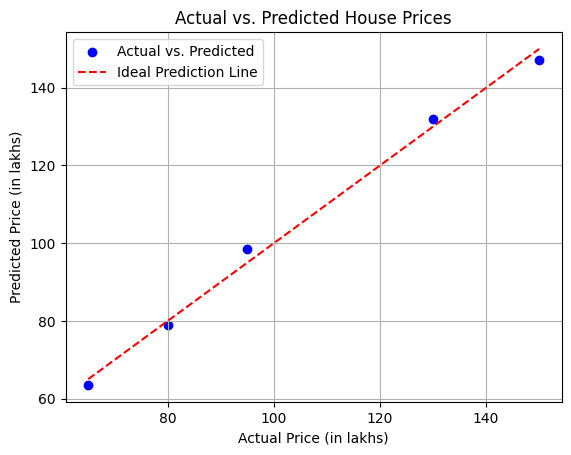

In [ ]:
# 6. Plot the results (Actual vs. Predicted)
predicted_prices = model.predict(X)
plt.scatter(y, predicted_prices, color='blue', label='Actual vs. Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Prediction Line') # Add ideal line
plt.xlabel('Actual Price (in lakhs)')
plt.ylabel('Predicted Price (in lakhs)')
plt.title('Actual vs. Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 1. Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
# 2. Create dataset with more columns
data = {
    'Size_sqft':    [1500, 1800, 2400, 3000, 3500, 4000, 4200],
    'Bedrooms':     [3,    4,    3,    5,    4,    5,    6],
    'Age_years':    [10,   5,    8,    2,    4,    1,    3],
    'Bathrooms':    [2,    2,    3,    4,    3,    4,    5],
    'Garage_spaces':[1,    2,    2,    3,    2,    3,    3],
    'Location_score':[7,   8,    7,    9,    8,    9,    10],
    'Price_lakhs':  [65,   80,   95,   130,  150,  170,  200]
}

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df

,Size_sqft,Bedrooms,Age_years,Bathrooms,Garage_spaces,Location_score,Price_lakhs
0,1500,3,10,2,1,7,65
1,1800,4,5,2,2,8,80
2,2400,3,8,3,2,7,95
3,3000,5,2,4,3,9,130
4,3500,4,4,3,2,8,150
5,4000,5,1,4,3,9,170
6,4200,6,3,5,3,10,200


In [ ]:
# 3. Features (X) and Target (y)
X = df[['Size_sqft', 'Bedrooms', 'Age_years', 'Bathrooms', 'Garage_spaces', 'Location_score']]
y = df['Price_lakhs']

In [ ]:
#train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# 5. Show model details
print("Intercept (b0):", model.intercept_)
print("Coefficients:", model.coef_)

Intercept (b0): -114.25035460992913
Coefficients: [ 0.04648582  8.67304965  3.64078014 -6.4677305   0.42659574  8.67304965]


In [ ]:
new_house = [[2000, 4, 3, 3,2,9,]]
predicted_price = model.predict(new_house)
print(f"Predicted Price: ₹{predicted_price[0]:.2f} lakhs")

Predicted Price: ₹83.84 lakhs


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Polynomial Regression is a type of regression where the relationship between the independent variable
𝑋
X and dependent variable
𝑦
y is not a straight line but a curve.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# 2. Create dataset
X = np.array([500, 1000, 1500, 2000, 2500, 3000]).reshape(-1, 1)
y = np.array([20, 40, 65, 120, 200, 330])  # Non-linear growth

In [ ]:
df

,Size_sqft,Bedrooms,Age_years,Bathrooms,Garage_spaces,Location_score,Price_lakhs
0,1500,3,10,2,1,7,65
1,1800,4,5,2,2,8,80
2,2400,3,8,3,2,7,95
3,3000,5,2,4,3,9,130
4,3500,4,4,3,2,8,150
5,4000,5,1,4,3,9,170
6,4200,6,3,5,3,10,200


In [ ]:
# 3. Transform features for polynomial regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


In [ ]:
# 4. Train model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [ ]:
# 5. Predict
X_range = np.linspace(500, 3000, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)


In [ ]:
# 7. Predict for a new house
new_house = [[2200]]
new_house_poly = poly.transform(new_house)
pred_price = model.predict(new_house_poly)
print(f"Predicted price for 2200 sqft house: ₹{pred_price[0]:.2f} lakhs")

Predicted price for 2200 sqft house: ₹153.81 lakhs


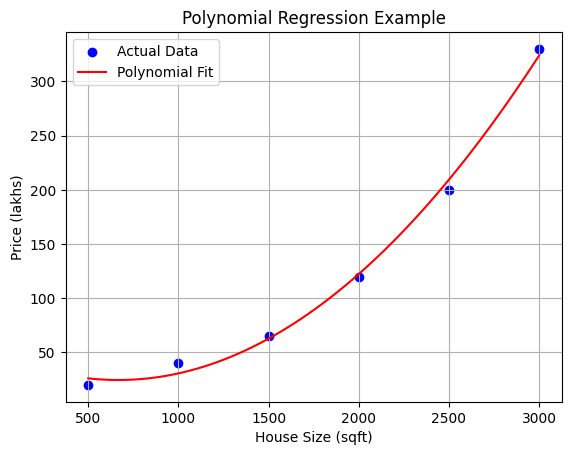

In [ ]:
# 6. Plot
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_range, y_pred, color='red', label='Polynomial Fit')
plt.xlabel('House Size (sqft)')
plt.ylabel('Price (lakhs)')
plt.title('Polynomial Regression Example')
plt.legend()
plt.grid(True)
plt.show()